---
# Cairo University Faculty of Engineering
## SBEN454 Data Mining and Machine Learning in Healthcare. 
## Assignment 1 

---

## Introduction to Machine Learning
For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [3]:
from numpy.ma.core import size
def answer_zero():
    features_number=size(cancer.feature_names)
    return features_number
print(answer_zero())

30


### Question 1
Pandas dataframes are much easier and more interpretable when dealing with tables. **Convert the cancer data into dataframe.**

Note: Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training any model.

*This function should return a (569, 31) DataFrame with *

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    
*and index = *

RangeIndex(start=0, stop=569, step=1)

In [4]:
def answer_one():
    cancernp=np.column_stack((cancer.data,cancer.target))
    cancerdf=pd.DataFrame(cancernp,columns=np.append(cancer.feature_names,['target']))
    return  cancerdf


print(answer_one())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

In [5]:
def answer_two():
    cancerdf = answer_one()
    
    cancerdf = answer_one()
    cd=cancerdf.groupby('target').size()

    return cd


answer_two()

target
0.0    212
1.0    357
dtype: int64

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

In [6]:
def answer_three():
    cancerdf = answer_one()
    
    X=cancerdf[cancerdf.columns[:30]]
    y=cancerdf[cancerdf.columns[-1]]
    
    return X, y

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets

In [7]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    
    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
    
    return X_train, X_test, y_train, y_test

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train`.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    
    knn=KNeighborsClassifier(1)
    knn.fit(X_train,y_train)
    
    return knn

### Question 6
Using your knn classifier, predict the class label using the median value for each feature.

In [58]:
def answer_six():
    cancerdf = answer_one()    
    # Your code here
    knn=answer_five()
    mean=cancerdf.mean()
    mean=mean.values[0:30]

    mean=mean.reshape(1, -1)
    #print(mean)
    pred=knn.predict(mean)
    
    return pred

print(answer_six())

[1.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

In [11]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    y_pred=knn.predict(X_test)
    
    return y_pred
print(answer_seven())

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.]


### Question 8
Find the score (accuracy) of your knn classifier using `X_test` and `y_test` & `X_train` and `y_train`. Do you notice overfitting or underfitting?

In [14]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    score=knn.score(X_test,y_test)
    
    return score
print(answer_eight())
print('As the accuracy score is about 0.92 or 92% -> no underfitting or overfitting')

0.916083916083916
As the accuracy score is about 0.92 or 92% -> no underfitting or overfitting


### Question 9
##### Accuracy Plot
* Create `mal_train_X`, `mal_train_y`,`ben_train_X`,`ben_train_y`, `mal_test_X`,`mal_test_y`, `ben_test_X` and `ben_test_y` portions of the dataset. Where `mal_train_X` contains all training samples that belongs to malignant class while `mal_train_y` contains all labels of the samples, and so on for other variables.

* Calculate Accuracy scores for each case and save all the results in a list called `scores` using knn model from question 5.

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [15]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook
    %matplotlib inline

    X_train, X_test, y_train, y_test = answer_four()

    knn=answer_five()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    
    mal_train_X=X_train[y_train==0]
    mal_train_y=y_train[y_train==0]
    ben_train_X=X_train[y_train==1]
    ben_train_y=y_train[y_train==1]
    mal_test_X=X_test[y_test==0]
    mal_test_y=y_test[y_test==0]
    ben_test_X=X_test[y_test==1]
    ben_test_y=y_test[y_test==1]

    scores=[knn.score(mal_train_X,mal_train_y),knn.score(ben_train_X,ben_train_y),knn.score(mal_test_X,mal_test_y),knn.score(ben_test_X,ben_test_y)]

    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

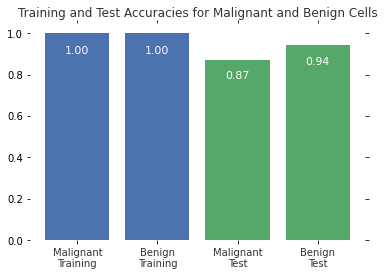

In [ ]:
accuracy_plot() 

### Question 10
1. Load Iris dataset from sklearn.
2. Split the data into training and testing (30% testing)
3. Create scatter plot.
4. From the scatter plot choose two features only to train a knn model with suitable "k" of your choice.
5. Evaluate your model performance and comment on your results.

In [17]:
!pip install mglearn

     |████████████████████████████████| 540 kB 14.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5541b146ab9bd22187438d753d53b3159cb33f4b752e2120279e1f8b65e49e33
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


The chosen features are the sepal width and petal length
Score= 0.9111111111111111
As the score is above 90%, the model performs good


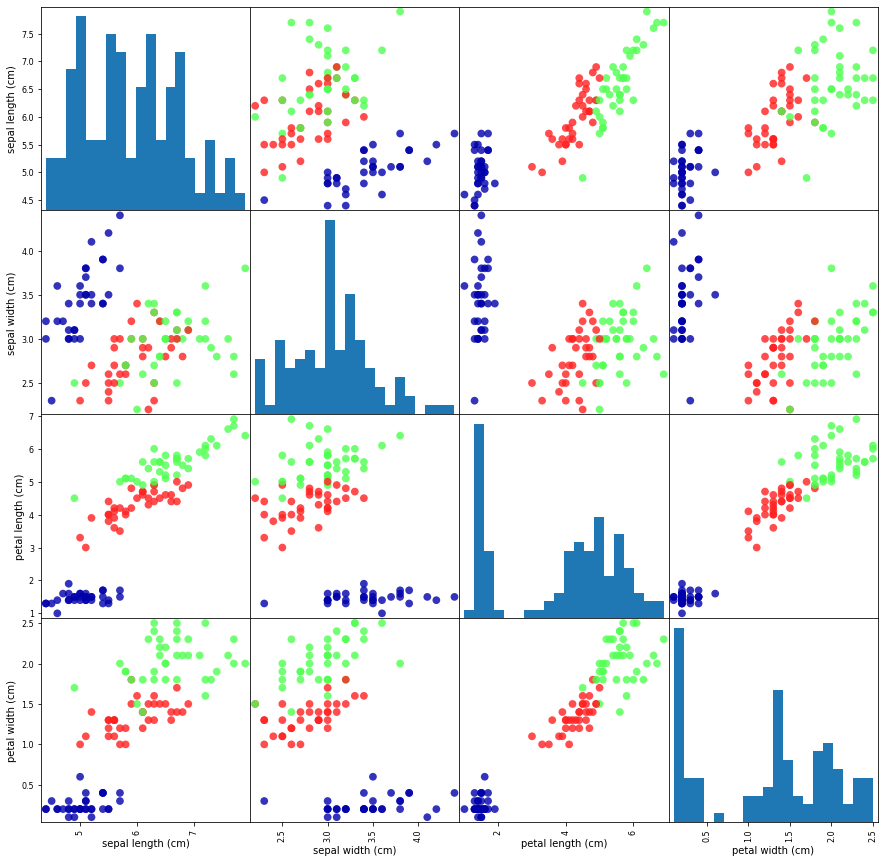

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
import mglearn

iris = load_iris()

irisnp=np.column_stack((iris.data,iris.target))
irisdf=pd.DataFrame(irisnp,columns=np.append(iris.feature_names,['target']))

X=irisdf[irisdf.columns[:30]]
y=irisdf[irisdf.columns[-1]]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30)

iris_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)

scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

knn=KNeighborsClassifier(3)
knn.fit(X_train[["sepal width (cm)","petal length (cm)"]],y_train)
score=knn.score(X_test[["sepal width (cm)","petal length (cm)"]],y_test)
print('The chosen features are the sepal width and petal length')
print('Score=',score)
print('As the score is above 90%, the model performs good')